In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt


In [45]:
cdata = pd.read_csv('BankChurners.csv')
cdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [70]:
#check head of the data
cdata.columns. unique()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
#cdata.replace('Less than $40K','1', inplace =True)
#cdata.replace('$60K - $80K','3', inplace =True)
#cdata.replace('$80K - $120K','4', inplace =True)
#cdata.replace('$120K +','5', inplace =True)
#cdata.replace('$40K - $60K','2', inplace =True)
#cdata.replace('Unknown','0', inplace =True)
#cdata.replace('0','Unknown', inplace =True)
#cdata.replace('M','2', inplace =True)
#cdata.replace('F','1', inplace =True)

In [ ]:
cdata.head(2)

In [72]:
cdata.Attrition_Flag.unique

<bound method Series.unique of 0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object>

In [73]:
data =cdata.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

#data =cdata.drop(columns = ['Attrition_Flag', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [49]:
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:>

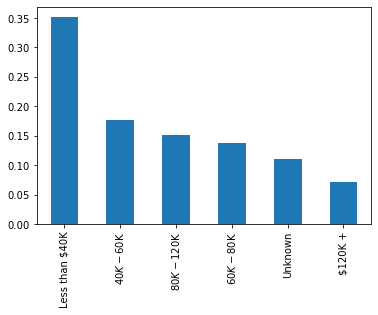

In [74]:
data.Income_Category.value_counts(normalize=True).plot.bar()

In [15]:
data.Credit_Limit.value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

In [ ]:
sns.boxplot(data.Credit_Limit)

In [16]:
data.iloc[0]

CLIENTNUM                           768805383
Attrition_Flag              Existing Customer
Customer_Age                               45
Gender                                      M
Dependent_count                             3
Education_Level                   High School
Marital_Status                        Married
Income_Category                   $60K - $80K
Card_Category                            Blue
Months_on_book                             39
Total_Relationship_Count                    5
Months_Inactive_12_mon                      1
Contacts_Count_12_mon                       3
Credit_Limit                          12691.0
Total_Revolving_Bal                       777
Avg_Open_To_Buy                       11914.0
Total_Amt_Chng_Q4_Q1                    1.335
Total_Trans_Amt                          1144
Total_Trans_Ct                             42
Total_Ct_Chng_Q4_Q1                     1.625
Avg_Utilization_Ratio                   0.061
Name: 0, dtype: object

<AxesSubplot:>

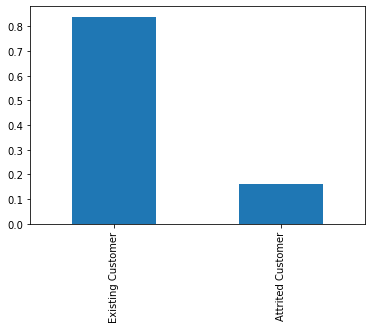

In [51]:
data.Attrition_Flag.value_counts(normalize=True).plot.bar()

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

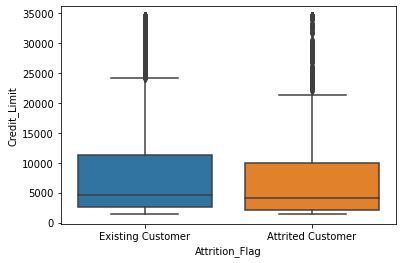

In [18]:
sns.boxplot(x='Attrition_Flag',y='Credit_Limit',data=data)

In [ ]:
data.head(2)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

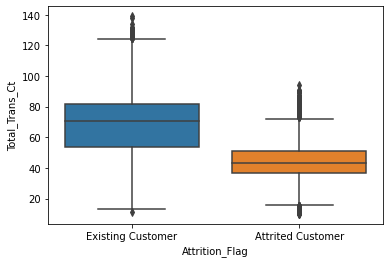

In [19]:
sns.boxplot(x='Attrition_Flag',y='Total_Trans_Ct',data=data)

In [ ]:
#Transaction count for 75% of attrited customers is lower than 25th Percentile to the existing customers
#75% of attrited customers have balances loer that 25% of existing customers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

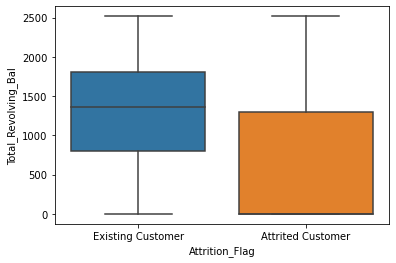

In [52]:
sns.boxplot(x='Attrition_Flag',y='Total_Revolving_Bal',data=data)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

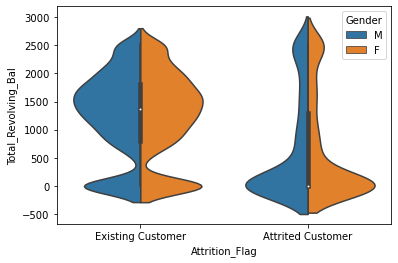

In [21]:
sns.violinplot(x='Attrition_Flag',y='Total_Revolving_Bal',data=data, hue='Gender', split=True)

<AxesSubplot:xlabel='Education_Level'>

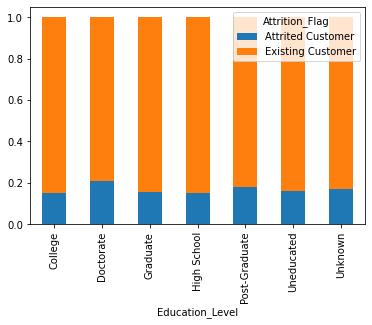

In [53]:
(pd.crosstab(data['Education_Level'],data['Attrition_Flag'], 
             normalize='index')
   .plot.bar(stacked=True)
)


In [ ]:
#Persons in the Doctorate cadre have higher attrition rate followed by Post-Graduate cadre

<AxesSubplot:xlabel='Income_Category'>

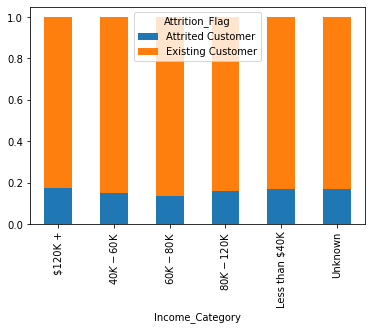

In [24]:
(pd.crosstab(data['Income_Category'],data['Attrition_Flag'], 
             normalize='index')
   .plot.bar(stacked=True)
)

<AxesSubplot:xlabel='Card_Category'>

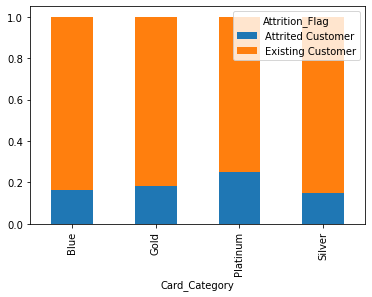

In [75]:
(pd.crosstab(data['Card_Category'],data['Attrition_Flag'], 
             normalize='index')
   .plot.bar(stacked=True)
)

In [ ]:
#from the above, individuals with using platinum cards have a higher attrition rate and followed by those individuals using the Gold cards.

In [76]:
data.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [77]:
data.Attrition_Flag.unique

<bound method Series.unique of 0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object>

In [78]:
data.replace('Less than $40K','1', inplace =True)
data.replace('$60K - $80K','3', inplace =True)
data.replace('$80K - $120K','4', inplace =True)
data.replace('$120K +','5', inplace =True)
data.replace('$40K - $60K','2', inplace =True)
data.replace('Unknown','0', inplace =True)

In [79]:
#check info() of your data frame
data.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,3,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,1,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,4,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [29]:
data.shape

(10127, 21)

In [81]:
categorical = ['Education_Level', 'Marital_Status','Card_Category', 'Gender']
categories = pd.get_dummies(data[categorical])
categories.head()

,Education_Level_0,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_0,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1


In [82]:
categories.shape

(10127, 17)

In [83]:
data = pd.concat([data,categories], axis=1)

In [84]:
data = data.drop(categorical,axis=1)

In [85]:
data.shape

(10127, 34)

In [86]:
data.head().dtypes

CLIENTNUM                          int64
Attrition_Flag                    object
Customer_Age                       int64
Dependent_count                    int64
Income_Category                   object
Months_on_book                     int64
Total_Relationship_Count           int64
Months_Inactive_12_mon             int64
Contacts_Count_12_mon              int64
Credit_Limit                     float64
Total_Revolving_Bal                int64
Avg_Open_To_Buy                  float64
Total_Amt_Chng_Q4_Q1             float64
Total_Trans_Amt                    int64
Total_Trans_Ct                     int64
Total_Ct_Chng_Q4_Q1              float64
Avg_Utilization_Ratio            float64
Education_Level_0                  uint8
Education_Level_College            uint8
Education_Level_Doctorate          uint8
Education_Level_Graduate           uint8
Education_Level_High School        uint8
Education_Level_Post-Graduate      uint8
Education_Level_Uneducated         uint8
Marital_Status_0

In [87]:
y = data['Attrition_Flag']
X = data.drop(columns =['Attrition_Flag'])

X.head(2)

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_0,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,768805383,45,3,3,39,5,1,3,12691.0,777,...,0,0,1,0,1,0,0,0,0,1
1,818770008,49,5,1,44,6,1,2,8256.0,864,...,0,0,0,1,1,0,0,0,1,0


In [88]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [89]:
#Decision Tree Classifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [90]:
D_C = DecisionTreeClassifier()

In [105]:
D_C.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
pred = D_C.predict(X_test)
print(pred, y_test.head(5).tolist())

['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Existing Customer' 'Existing Customer' 'Existing Customer'] ['Existing Customer', 'Existing Customer', 'Existing Customer', 'Existing Customer', 'Existing Customer']


In [96]:
#Calculating the accuracy score
print(accuracy_score(pred, y_test))

0.9372994322389533


In [110]:
K_N = KNeighborsClassifier()
K_N.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
pred3 = K_N.predict(X_test)
print(y_test.head(5).tolist(), pred3)

['Existing Customer', 'Existing Customer', 'Existing Customer', 'Existing Customer', 'Existing Customer'] ['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Existing Customer' 'Existing Customer' 'Existing Customer']


In [112]:
print(accuracy_score(pred3, y_test))

0.8175759071834116


In [114]:
R_N = RandomForestClassifier()
R_N.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
pred4 = R_N.predict(X_test)

In [117]:
print(y_test.head(5).tolist(), pred4)

['Existing Customer', 'Existing Customer', 'Existing Customer', 'Existing Customer', 'Existing Customer'] ['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Existing Customer' 'Existing Customer' 'Existing Customer']


In [118]:
print(accuracy_score(pred4, y_test))

0.9508763268328808


In [ ]:
#From the model developed above, the RandomForestClassifier model is recomended for deployment as it give a 95% accuracy score.